 # Oasis Infobyte Internship
 ###### Batch - January Phase 2 OIBSIP
 ## Author -  HariHaran Venkatesan

## Iris Flower Classification Project using Machine Learning
##### Datasets 
http://archive.ics.uci.edu/ml/datasets/Iris

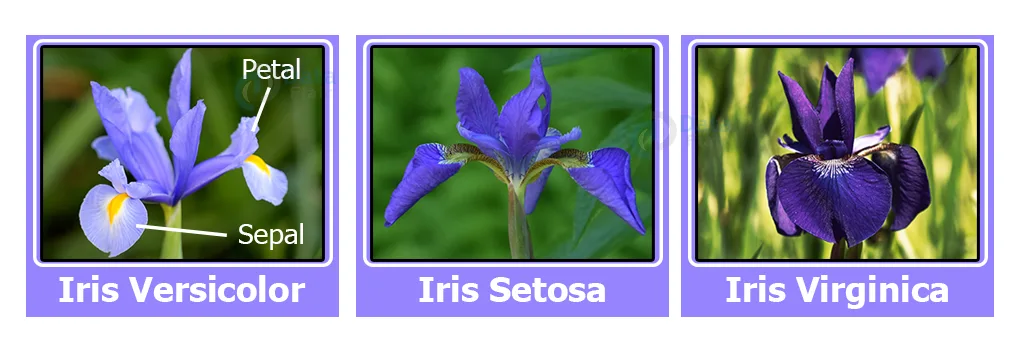

## Steps to Classify Iris Flower:

1. Load the data
2. Analyze and visualize the dataset
3. Model training.
4. Model Evaluation.
5. Testing the model.

## Step 1 – Load the data:

In [1]:
# DataFlair Iris Flower Classification
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

First, we’ve imported some necessary packages for the project.

* Numpy will be used for any computational operations.
* We’ll use Matplotlib and seaborn for data visualization.
* Pandas help to load data from various sources like local storage, database, excel file, CSV file, etc.

In [2]:
 columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] 
# Load the data
df = pd.read_csv('iris.data', names=columns)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


* Next, we load the data using pd.read_csv() and set the column name as per the iris data information.
* Pd.read_csv reads CSV files. CSV stands for comma separated value.
* df.head() only shows the first 5 rows from the data set table.
* All the numerical values are in centimeters.

## Step 2 – Analyze and visualize the dataset:
Let’s see some information about the dataset.

In [3]:
# Some basic statistical analysis about the data
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From this description, we can see all the descriptions about the data, like average length and width, minimum value, maximum value, the 25%, 50%, and 75% distribution value, etc.

Let’s visualize the dataset.

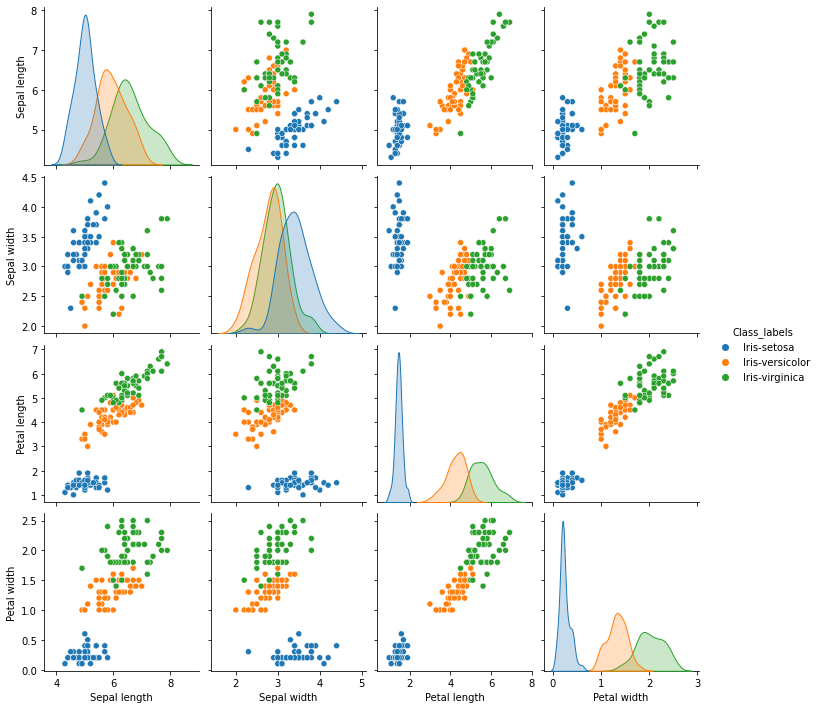

In [4]:
# Visualize the whole dataset
sns.pairplot(df, hue='Class_labels')

* To visualize the whole dataset we used the seaborn pair plot method. It plots the whole dataset’s information.
* From this visualization, we can tell that iris-setosa is well separated from the other two flowers.
* And iris virginica is the longest flower and iris setosa is the shortest.


Now let’s plot the average of each feature of each class.

In [5]:
# Separate features and target  
data = df.values
X = data[:,0:4]
Y = data[:,4]

Here we separated the features from the target value.

In [6]:
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

* Np.average calculates the average from an array.
* Here we used two for loops inside a list. This is known as list comprehension.
* List comprehension helps to reduce the number of lines of code.
* The Y_Data is a 1D array, but we have 4 features for every 3 classes. So we reshaped Y_Data to a (4, 3) shaped array.
* Then we change the axis of the reshaped matrix.

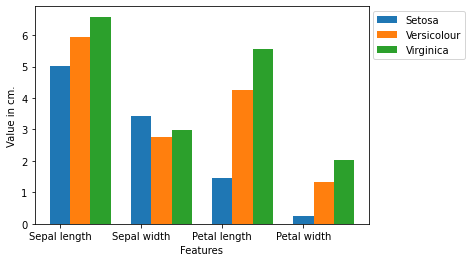

In [7]:
# Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

* We used matplotlib to show the averages in a bar plot.
* Here we can clearly see the verginica is the longest and setosa is the shortest flower.

## Step 3 – Model training:

In [8]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Using train_test_split we split the whole data into training and testing datasets. Later we’ll use the testing dataset to check the accuracy of the model.


In [9]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

* Here we imported a support vector classifier from the scikit-learn support vector machine.
* Then, we created an object and named it svn.
* After that, we feed the training dataset into the algorithm by using the svn.fit() method.

## Step 4 – Model Evaluation:

In [10]:
# Predict from the test dataset
predictions = svn.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9333333333333333

* Now we predict the classes from the test dataset using our trained model.
* Then we check the accuracy score of the predicted classes.
* Accuracy_score() takes true values and predicted values and returns the percentage of accuracy.

### Output: 0.9666666666666667

The accuracy is above 96%.

Now let’s see the detailed classification report based on the test dataset.

In [11]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



* The classification report gives a detailed report of the prediction.
* Precision defines the ratio of true positives to the sum of true positive and false positives.
* Recall defines the ratio of true positive to the sum of true positive and false negative.
* F1-score is the mean of precision and recall value.
* Support is the number of actual occurrences of the class in the specified dataset.

## Step 5 – Testing the model:

In [12]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Here we take some random values based on the average plot to see if the model can predict accurately.

### Output:

Prediction of Species: [‘Iris-setosa’ ‘Iris-versicolor’ ‘Iris-virginica’]

It looks like the model is predicting correctly because the setosa is shortest and virginica is the longest and versicolor is in between these two.

In [13]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)

# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

* We can save the model using pickle format.
* And again we can load the model in any other program using pickle and use it using model.predict to predict the iris data.

## Summary:
In this project, we learned to train our own supervised machine learning model using Iris Flower Classification Project with Machine Learning. Through this project, we learned about machine learning, data analysis, data visualization, model creation, etc.